/Users/kathelopez/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


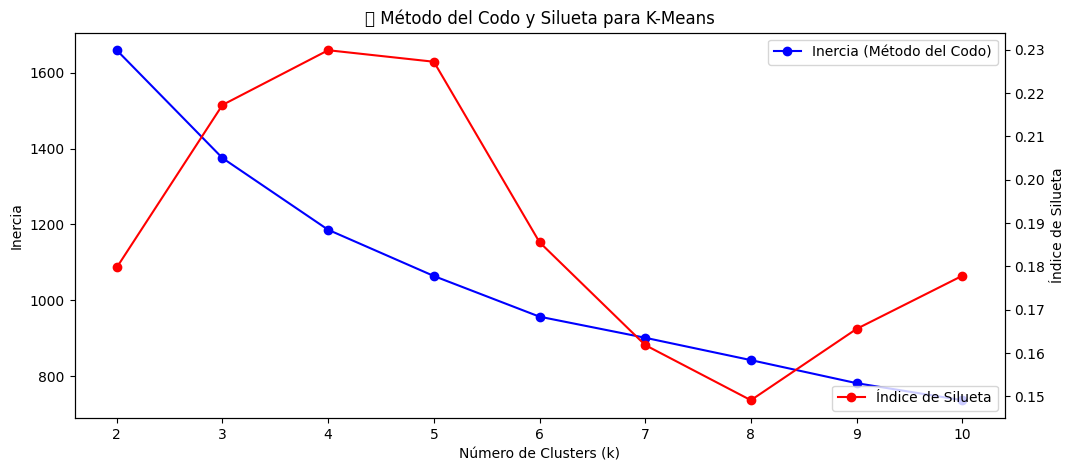

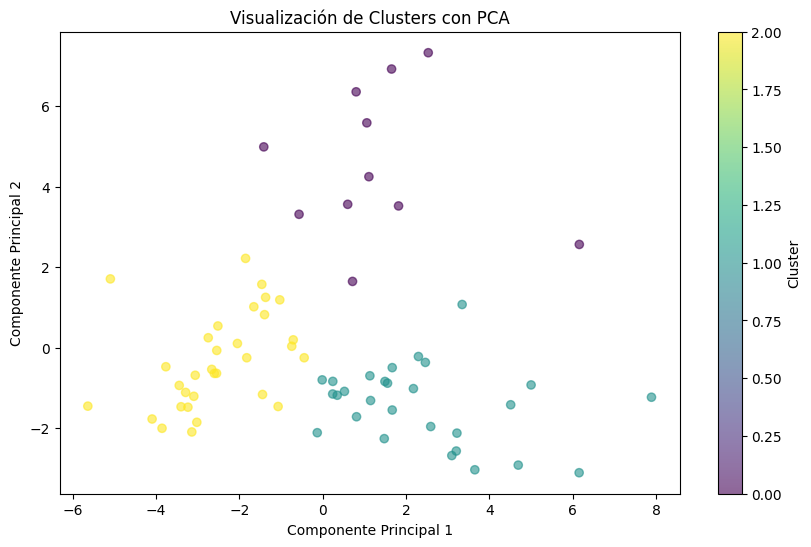


✔ Dataset con clusters guardado como 'dataset_clustering.csv'

📌 Primeras filas del dataset con clusters:
  Country Name           Region      Continent  \
0      Albania  Southern Europe         Europe   
1     Alemania   Western Europe         Europe   
2    Argentina    South America  South America   
3      Austria   Western Europe         Europe   
4      Bahamas        Caribbean  North America   

   Inflación, deflactor del PIB (%) anual  \
0                                   0.564   
1                                   1.685   
2                                  26.580   
3                                   2.293   
4                                   5.309   

   Indice facilidad para hacer negocios  Crecimiento PIB per capita  \
0                                  82.0                       2.517   
1                                  22.0                       0.777   
2                                 126.0                       1.661   
3                                  27

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib
from sklearn.decomposition import PCA

# 📌 1. Cargar y preparar los datos
file_path = "data_2/country_resumido_1.csv"  # Ajusta la ruta del archivo
df = pd.read_csv(file_path, delimiter=",")  # Asegurar correcta lectura del CSV

# 📌 2. Seleccionar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_cols]

# 📌 3. Manejo de valores NaN
df_numeric_filled = df_numeric.fillna(df_numeric.mean())

# 📌 4. Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric_filled)

# 📌 5. Verificar si aún hay NaN después de la normalización
if np.isnan(df_scaled).any():
    raise ValueError("df_scaled aún contiene NaN después del preprocesamiento.")

# 📌 6. Determinar el número óptimo de clusters
inertia = []
silhouette_scores = []
K_range = range(2, 11)  # Evaluamos de 2 a 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# 📌 7. Graficar el método del codo y el índice de silueta
fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.plot(K_range, inertia, 'bo-', label='Inercia (Método del Codo)')
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Inercia')
ax1.set_title('📈 Método del Codo y Silueta para K-Means')
ax1.legend(loc='upper right')

ax2 = ax1.twinx()
ax2.plot(K_range, silhouette_scores, 'ro-', label='Índice de Silueta')
ax2.set_ylabel('Índice de Silueta')
ax2.legend(loc='lower right')

plt.show()

# 📌 8. Aplicar K-Means con el mejor número de clusters
best_k = 3  # Puedes cambiarlo según el gráfico del codo
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# 📌 9. Guardar el modelo entrenado y el escalador
joblib.dump(kmeans, "modelo_kmeans.pkl")
joblib.dump(scaler, "scaler.pkl")

# 📌 10. Visualización de Clusters con PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df["Cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualización de Clusters con PCA")
plt.colorbar(label="Cluster")
plt.show()

# 📌 11. Guardar el dataframe con clusters asignados
df.to_csv("dataset_clustering.csv", index=False)
print("\n✔ Dataset con clusters guardado como 'dataset_clustering.csv'")

# 📌 12. Mostrar algunas filas del dataset final
print("\n📌 Primeras filas del dataset con clusters:")
print(df.head())

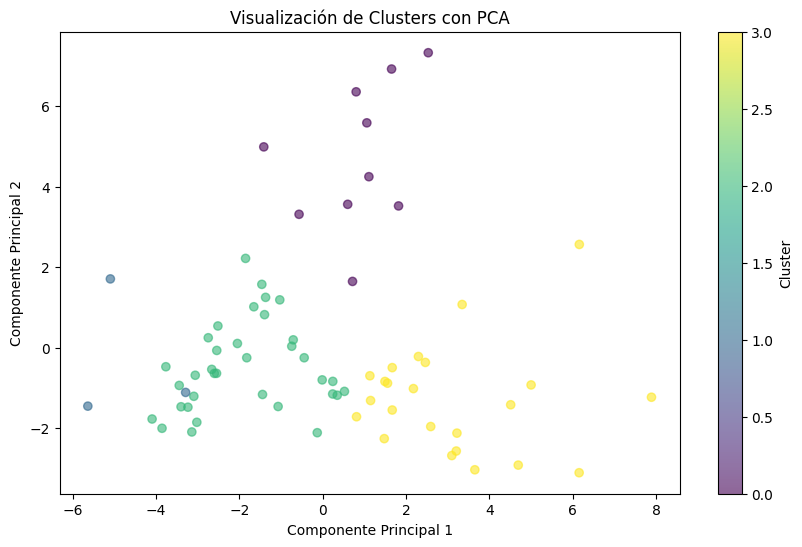

In [11]:
best_k = 4  # O prueba con 5
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Reducir la dimensionalidad a 2D con PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Graficar los clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df["Cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualización de Clusters con PCA")
plt.colorbar(label="Cluster")
plt.show()

/Users/kathelopez/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


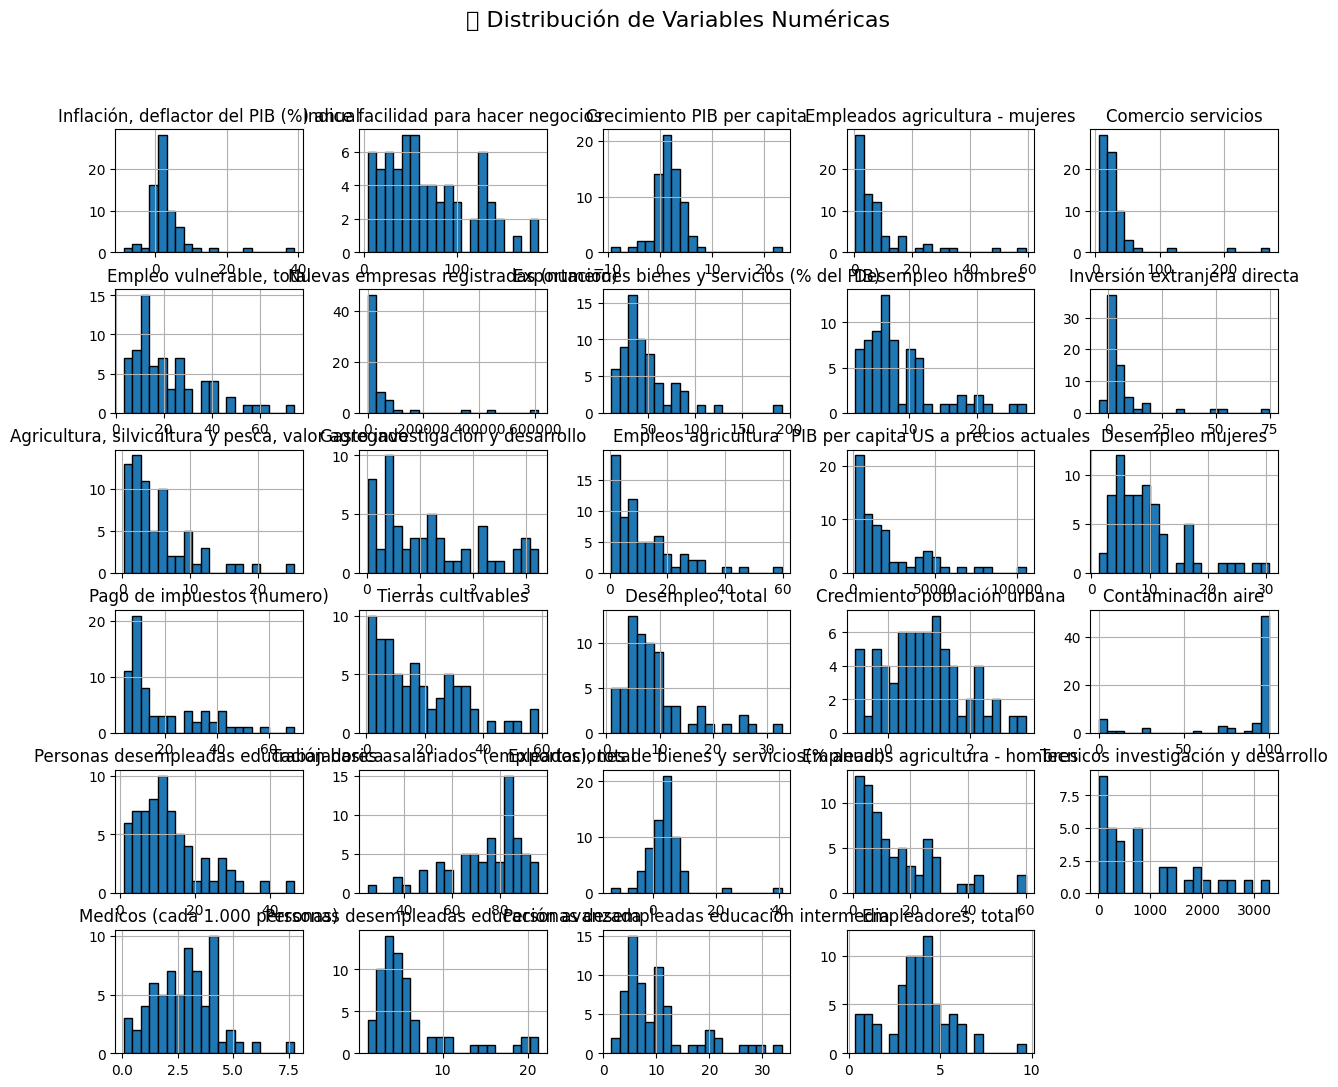

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 📌 2. Cargar y preparar los datos
file_path = "data_2/country_resumido_1.csv"  # Ajusta la ruta del archivo
df = pd.read_csv(file_path, delimiter=",")  # Cargar CSV con separador ";"

# Seleccionar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=['float64']).columns
df_numeric = df[numeric_cols]

# 📌 3. Visualizar la distribución de variables numéricas
df_numeric.hist(figsize=(15, 12), bins=20, edgecolor="black")
plt.suptitle("📊 Distribución de Variables Numéricas", fontsize=16)
plt.show()

# Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# 📌 4. Determinar el número óptimo de clusters (Método del Codo y Silueta)
inertia = []
silhouette_scores = []
K_range = range(2, 11)  # Evaluamos de 2 a 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# 📌 5. Graficar el método del codo y el índice de silueta
fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.plot(K_range, inertia, 'bo-', label='Inercia (Método del Codo)')
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Inercia')
ax1.set_title('📈 Método del Codo y Silueta para K-Means')
ax1.legend(loc='upper right')

ax2 = ax1.twinx()
ax2.plot(K_range, silhouette_scores, 'ro-', label='Índice de Silueta')
ax2.set_ylabel('Índice de Silueta')
ax2.legend(loc='lower right')

plt.show()

# 📌 6. Aplicar K-Means con el mejor número de clusters (basado en el gráfico)
best_k = 3  # Puedes cambiarlo según el gráfico del codo
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# 📌 7. Definir preguntas para clasificar usuarios
preguntas = [
    "¿Qué tan importante es para ti la calidad del sistema de salud?",
    "¿Prefieres un país con alta empleabilidad y bajo desempleo?",
    "¿Es importante que el país tenga un crecimiento económico positivo?",
    "¿Prefieres un país con alta facilidad para hacer negocios?",
    "¿Te interesa la estabilidad laboral en un país con más asalariados?",
    "¿Es relevante que el país tenga alta urbanización e infraestructura?",
    "¿Consideras clave la cantidad de empresas registradas en un país?",
    "¿Prefieres una economía basada en tecnología y servicios?",
    "¿Te gustaría un país con oportunidades tanto para empleadores como empleados?",
    "¿Es importante para ti la diversidad de empleo en distintos sectores?",
]

opciones = [
    "Muy importante, Moderado, No es relevante",
    "Sí, prefiero países con bajo desempleo, No me afecta tanto",
    "Sí, quiero un país con PIB en crecimiento, No es mi prioridad",
    "Sí, prefiero un país con facilidad para hacer negocios, No es tan relevante",
    "Sí, la estabilidad laboral es clave, No es prioritario",
    "Sí, prefiero un país con alto crecimiento urbano, No es importante",
    "Sí, un alto número de empresas registradas es clave, No lo considero necesario",
    "Sí, prefiero economías tecnológicas y de servicios, No me importa si es agrícola",
    "Sí, me gustaría un país que favorezca empleadores y empleados, No es necesario",
    "Sí, quiero variedad de oportunidades laborales, No me importa mucho el sector",
]

df_preguntas = pd.DataFrame({"Pregunta": preguntas, "Opciones": opciones})
print("\n📌 Preguntas para el usuario:")
print(df_preguntas)

# 📌 8. Función para clasificar un usuario en un cluster
def clasificar_usuario(respuestas):
    """
    Clasifica al usuario en un cluster basado en sus respuestas.

    Parámetro:
    - respuestas: diccionario con claves como las variables y valores numéricos.

    Retorna:
    - Cluster más cercano según las respuestas.
    """
    # Completar respuestas faltantes con la media de cada variable
    respuestas_completas = df_numeric.mean().to_dict()
    respuestas_completas.update(respuestas)  # Reemplazar con valores del usuario

    # Convertir respuestas en array con el orden correcto
    usuario_vector = np.array([respuestas_completas[col] for col in numeric_cols]).reshape(1, -1)

    # Normalizar las respuestas del usuario
    usuario_vector_scaled = scaler.transform(usuario_vector)

    # Predecir el cluster del usuario
    return kmeans.predict(usuario_vector_scaled)[0]

# 📌 9. Simulación de respuestas de usuario
respuestas_usuario = {
    "Médicos (por cada 1.000 personas)": 8,  # Alta calidad de salud
    "Personas desempleadas educación avanzada": 2,  # Bajo desempleo
    "Índice facilidad para hacer negocios": 90,  # País favorable para negocios
    "Crecimiento PIB per cápita": 3.5,  # Crecimiento económico positivo
    "Empleos agricultura": 5,  # Baja dependencia del sector agrícola
}

# Clasificar usuario
cluster_usuario = clasificar_usuario(respuestas_usuario)
print(f"\n📌 El usuario pertenece al Cluster {cluster_usuario}")

# 📌 10. Recomendar los 5 mejores países dentro del cluster asignado
pais_cluster = df[df["Cluster"] == cluster_usuario]

# Ordenar por facilidad de negocios (sin mostrar PIB per cápita)
pais_recomendados = pais_cluster.sort_values(
    by=["Índice facilidad para hacer negocios"],
    ascending=True
).head(5)

# 📌 11. Mostrar resultados detallados
print("\n📌 Respuestas exactas del usuario:")
respuestas_detalladas = pd.DataFrame({
    "Variable": respuestas_usuario.keys(),
    "Valor Ingresado": respuestas_usuario.values(),
})
print(respuestas_detalladas)

print("\n📌 Países recomendados para el usuario:")
print(pais_recomendados[["Country Name", "Continent", "Índice facilidad para hacer negocios"]])